# Diamonds Case Study


Our focus will be on answering the question about the degree of importance that each of these quality measures has on the pricing of a diamond.

For the case study, we will concentrate only the variables in the top five bullet points: price and the four 'C's of diamond grade. 

The dataset consists of almost 54,000 rows and 10 columns:

- _price_: Price in dollars. Data was collected in 2008.
- _carat_: Diamond weight. 1 carat is equal to 0.2 grams.
- _cut_: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
- _color_: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
- _clarity_: Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
- _x, y, z_: Diamond length, width, and depth, respectively, in mm.
- _table_: Ratio of width of top face of diamond to its overall width, as a percentage.
- _depth_: Proportional depth of diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [3]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

The diamond price distribution is highly skewed to the right. It means that most diamonds have a low price.


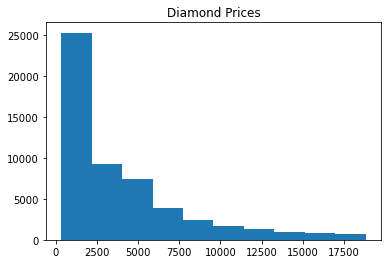

In [5]:
# univariate plot of diamond prices
plt.hist(diamonds.price);
plt.title('Diamond Prices');

text = 'The diamond price distribution is highly skewed to the right. It means that most diamonds have a low price.'
print(text)

Comment 1: You should create a histogram for price, since it is a numeric variable. Your initial plots should show that diamond price follows a highly skewed distribution. If you haven't tried a log scaling, then try that now.

In [6]:
# to set the scale
np.log10(diamonds.price.describe())

count    4.731911
mean     3.594702
std      3.600912
min      2.513218
25%      2.977724
50%      3.380392
75%      3.726258
max      4.274689
Name: price, dtype: float64

Because of the highly skewed distribution, it is often preferable to use log-normal transformation of the data. With the transformation, we can suspect a bimodal distribution with one peak around ~ 500-1000 $ and one around ~ 5000 $. Also, the end is not a smooth tail but rather a cut off.


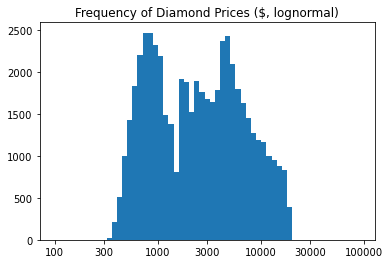

In [7]:
# univariate plot of diamond prices
text = 'Because of the highly skewed distribution, it is often preferable to use log-normal transformation of the data. With the transformation, we can suspect a bimodal distribution with one peak around ~ 500-1000 $ and one around ~ 5000 $. Also, the end is not a smooth tail but rather a cut off.'
print(text)

# data transformation
# price = diamonds.price -- Dont have to transform the data first.
# x = np.log10(price)
x = diamonds.price

# axis transformation
bins = 10 ** np.arange(2, 5, 0.05)
ticks = [10**2, 300, 10**3, 3000, 10**4, 30000, 10**5]
labels = ['{}'.format(v) for v in ticks]

plt.hist(x, bins = bins);
plt.title('Frequency of Diamond Prices ($, lognormal)');

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

Under a log scale, you should see that the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.

Next, is there an interesting pattern in diamond 'carat' metric (carat weight) values?

The diamond weight curve is also highly right skewed.


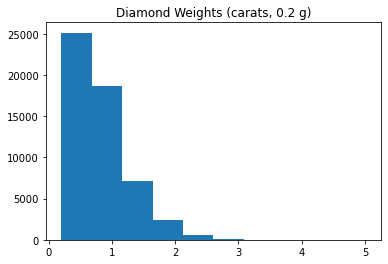

In [8]:
# univariate plot of carat weights
plt.hist(diamonds.carat);
plt.title('Diamond Weights (carats, 0.2 g)');

text = 'The diamond weight curve is also highly right skewed.'
print(text)


In [9]:
np.log10(diamonds.carat.describe())

count    4.731911
mean    -0.098030
std     -0.324211
min     -0.698970
25%     -0.397940
50%     -0.154902
75%      0.017033
max      0.699838
Name: carat, dtype: float64

Because of the highly skewed distribution, we use a log-normal transformation of the data. With the transformation, the observation is a multimodal distribution perhaps due to standard weights?


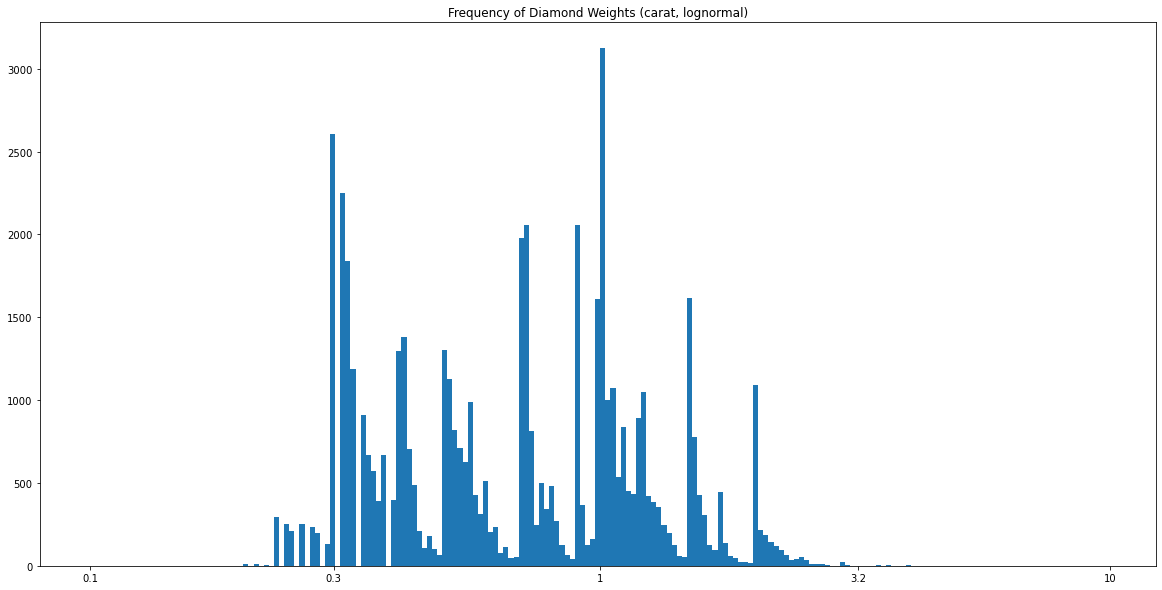

In [10]:
# univariate plot of diamond prices
text = 'Because of the highly skewed distribution, we use a log-normal transformation of the data. With the transformation, the observation is a multimodal distribution perhaps due to standard weights?'
print(text)

# data transformation
# price = diamonds.price -- Dont have to transform the data first.
# x = np.log10(price)
x = diamonds.carat

# fig def
plt.figure(figsize = (20,10))

# axis transformation
bins = 10 ** np.arange(-1, 1, 0.01)
ticks = [10**-1, round(10**-0.5, 1), 10**0, round(10**0.5, 1), 10**1]
labels = ['{}'.format(v) for v in ticks]

plt.hist(x, bins = bins);
plt.title('Frequency of Diamond Weights (carat, lognormal)');

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',     # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

Let's explore the other three 'C' quality measures: cut, color, and clarity.

In [11]:
diamonds.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

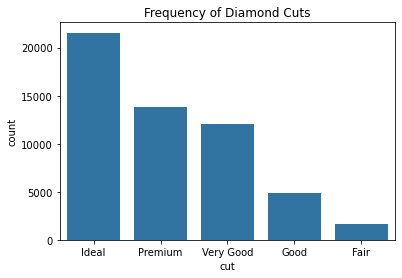

In [12]:
base_color = sb.color_palette()[0]

order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
diamonds.cut = diamonds.cut.astype('category')
diamonds.cut.cat.set_categories(order, inplace=True)

sb.countplot(data = diamonds, x = 'cut', color = base_color);
plt.title('Frequency of Diamond Cuts');

text = 'There is a consistent decrease in frequency as the cut quality decreases.'

The distribution is roughly unimodal, with the middle quality G having the highest frequency. The higher quality diamonds have higher frequency than the lower.


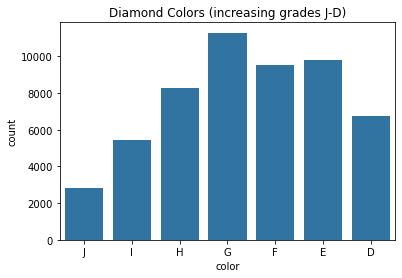

In [13]:
base_color = sb.color_palette()[0]

order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
diamonds.color = diamonds.color.astype('category')
diamonds.color.cat.set_categories(order, inplace=True)

sb.countplot(data=diamonds, x='color', color = base_color);
plt.title('Diamond Colors (increasing grades J-D)');

text = 'The distribution is roughly unimodal, with the middle quality G having the highest frequency. The higher quality diamonds have higher frequency than the lower.'
print(text)

The diamond clarity distribution is slightly right skewed, with the most frequent clarity SI1, VS2 and SI2. Thereafter, there is a relatively frequent slope towards higher clarity quality. Only a few have visible inclusions.


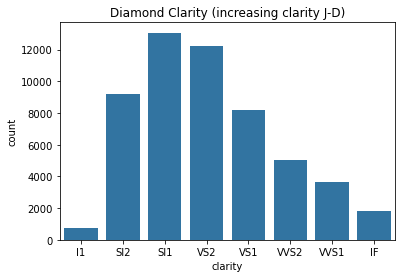

In [14]:
base_color = sb.color_palette()[0]

order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
diamonds.clarity = diamonds.clarity.astype('category')
diamonds.clarity.cat.set_categories(order, inplace=True)

sb.countplot(data=diamonds, x='clarity', color = base_color);
plt.title('Diamond Clarity (increasing clarity J-D)');

text = 'The diamond clarity distribution is slightly right skewed, with the most frequent clarity SI1, VS2 and SI2. Thereafter, there is a relatively frequent slope towards higher clarity quality. Only a few have visible inclusions.' 
print(text)


## Bivariate Exploration
We'll investigate relationships between pairs of price, carat, cut, color, and clarity, particularly how each of them relate to diamond price.

In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [16]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [17]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [18]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

To visualize 2 numeric variables, scatter plot is a good option. There is a clear positive trend between weight (carat) and price. Although the trend seems more exponential than linear, contain a distinct pattern and above 1 carat there is a very high variability.


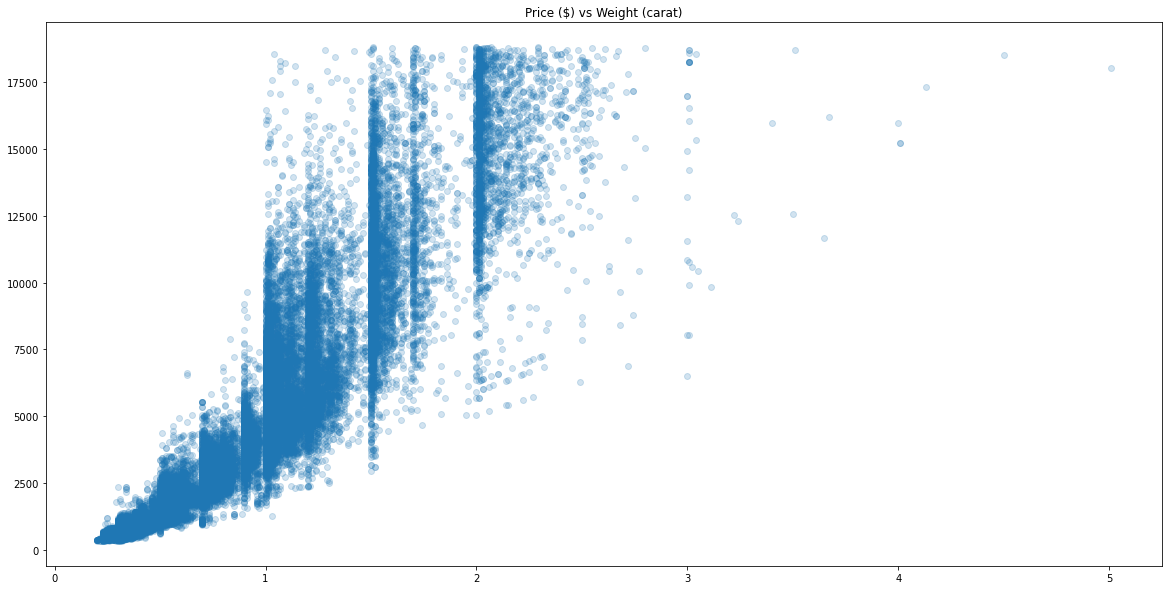

In [19]:
# price vs weight (carat)
plt.figure(figsize = (20,10))
plt.scatter(data = diamonds, x = 'carat', y = 'price', alpha = 0.2)

plt.title('Price ($) vs Weight (carat)')

text = 'To visualize 2 numeric variables, scatter plot is a good option. There is a clear positive trend between weight (carat) and price. Although the trend seems more exponential than linear, contain a distinct pattern and above 1 carat there is a very high variability.'
print(text)

The transformation of both axis (price in $ and weight in carat) results in a linear pattern. Also, the distinct lines are still found in the visualization.


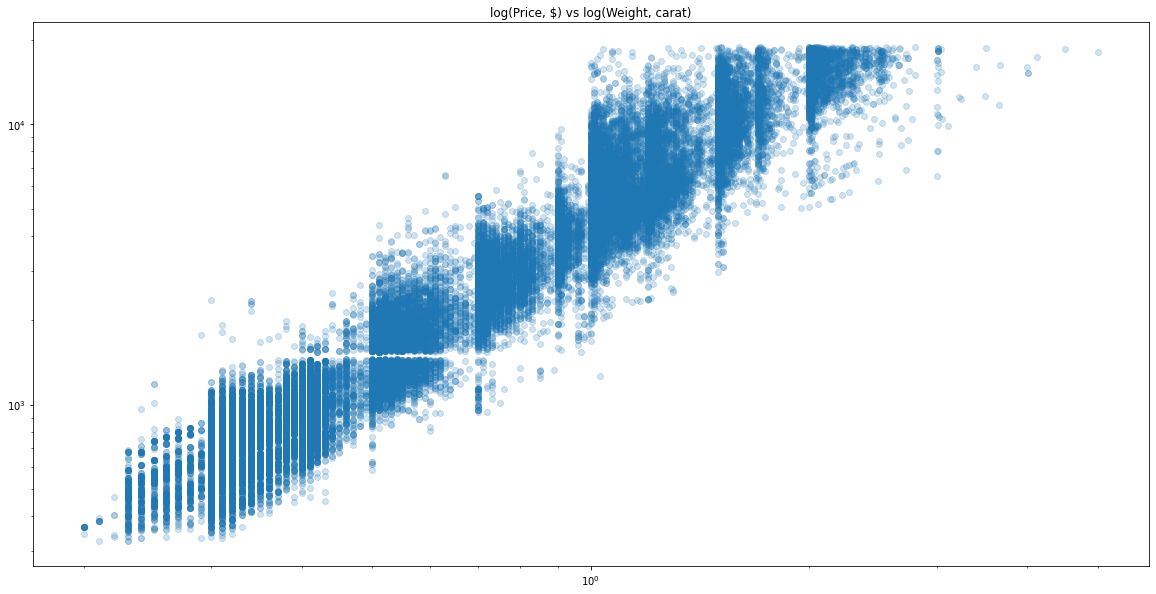

In [20]:
# price vs weight (carat) transformation
plt.figure(figsize = (20,10))
plt.scatter(data = diamonds, x = 'carat', y = 'price', alpha = 0.2)

plt.xscale('log')
plt.yscale('log')

plt.title('log(Price, $) vs log(Weight, carat)');

text = 'The transformation of both axis (price in $ and weight in carat) results in a linear pattern. Also, the distinct lines are still found in the visualization.'
print(text)



In [21]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

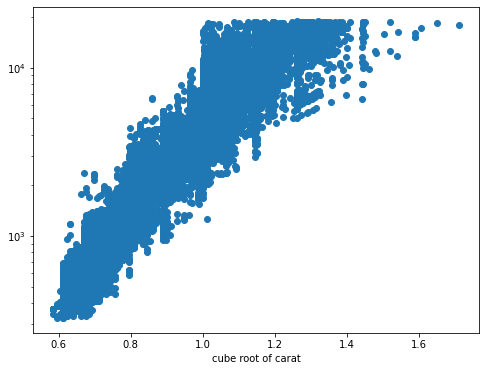

In [22]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])

plt.scatter(data = diamonds, x = 'cr_carat', y = 'price')

plt.xlabel('cube root of carat')

plt.yscale('log')

plt.show()

In [23]:
diamonds.dtypes

carat        float64
cut         category
color       category
clarity     category
depth        float64
table        float64
price          int64
x            float64
y            float64
z            float64
cr_carat     float64
dtype: object

1 numeric versus 1 categorical variable can be best illustrated by violin, box or barplot.

None of the cut categories are statistical significant. However, it looks like a low quality cut is within a slightly higher price range than for the ideal cut.

None of the color categories are statistical significant. However, it looks like a low quality color is within a slightly higher price range than for the good quality color.

None of the clarity categories are statistical significant. However, it looks like a low quality clarity is within a slightly higher price range than for the good clarity.

The findings are contra-intuitive from what we would have expected. Further, a deeper investigation is needed.


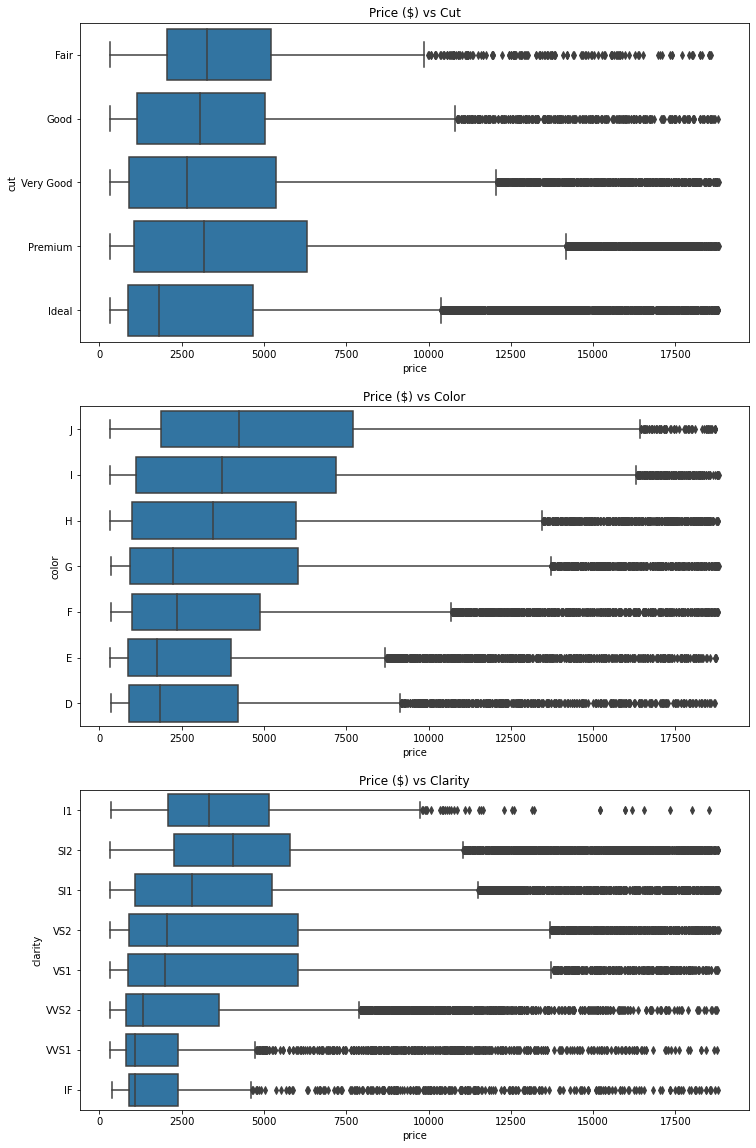

In [24]:
# bivariate plots of price vs. cut, color, clarity
text = '1 numeric versus 1 categorical variable can be best illustrated by violin, box or barplot.\n'
print(text)

plt.figure(figsize=(12,20))
base_color = sb.color_palette()[0]

# price vs cut
plt.subplot(3,1,1)
sb.boxplot(data=diamonds, y = 'cut', x = 'price', color = base_color)
plt.title('Price ($) vs Cut')

text_cut = 'None of the cut categories are statistical significant. However, it looks like a low quality cut is within a slightly higher price range than for the ideal cut.\n'
print(text_cut)

# price vs color
plt.subplot(3,1,2)
sb.boxplot(data=diamonds, y = 'color', x = 'price', color = base_color)
plt.title('Price ($) vs Color')

text_cut = 'None of the color categories are statistical significant. However, it looks like a low quality color is within a slightly higher price range than for the good quality color.\n'
print(text_cut)

# price vs clarity
plt.subplot(3,1,3)
sb.boxplot(data=diamonds, y = 'clarity', x = 'price', color = base_color)
plt.title('Price ($) vs Clarity')

text_cut = 'None of the clarity categories are statistical significant. However, it looks like a low quality clarity is within a slightly higher price range than for the good clarity.\n'
print(text_cut)

text = 'The findings are contra-intuitive from what we would have expected. Further, a deeper investigation is needed.'
print(text)

The contra-intuitive pattern that lower quality yielding a higher price is even more clear in the violinplots.


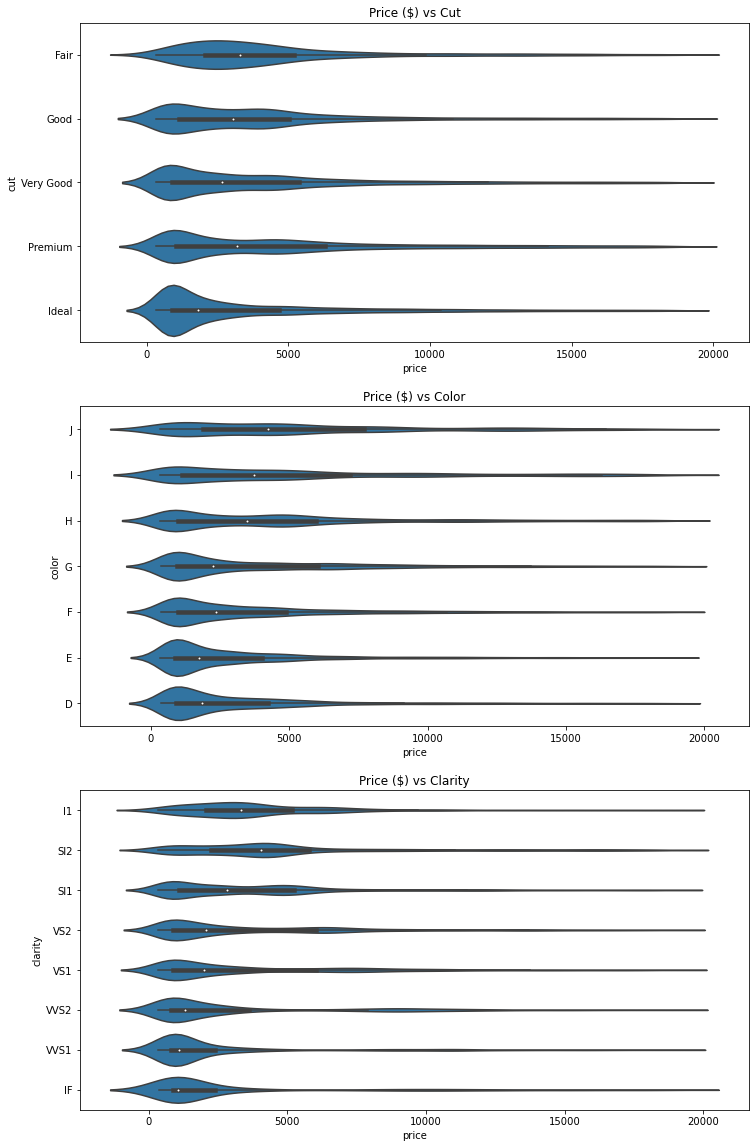

In [25]:
# bivariate plots of price vs. cut, color, clarity
# text = '1 numeric versus 1 categorical variable can be best illustrated by violin, box or barplot.\n'
# print(text)

plt.figure(figsize=(12,20))
base_color = sb.color_palette()[0]

# price vs cut
plt.subplot(3,1,1)
sb.violinplot(data=diamonds, y = 'cut', x = 'price', color = base_color)
plt.title('Price ($) vs Cut')

# text_cut = 'None of the cut categories are statistical significant. However, it looks like a low quality cut is within a slightly higher price range than for the ideal cut.\n'
# print(text_cut)

# price vs color
plt.subplot(3,1,2)
sb.violinplot(data=diamonds, y = 'color', x = 'price', color = base_color)
plt.title('Price ($) vs Color')

# text_cut = 'None of the color categories are statistical significant. However, it looks like a low quality color is within a slightly higher price range than for the good quality color.\n'
# print(text_cut)

# price vs clarity
plt.subplot(3,1,3)
sb.violinplot(data=diamonds, y = 'clarity', x = 'price', color = base_color)
plt.title('Price ($) vs Clarity')

# text_cut = 'None of the clarity categories are statistical significant. However, it looks like a low quality clarity is within a slightly higher price range than for the good clarity.\n'
# print(text_cut)

text = 'The contra-intuitive pattern that lower quality yielding a higher price is even more clear in the violinplots.'
print(text)

1 numeric versus 1 categorical variable can be best illustrated by violin, box or barplot.

The findings explains pattern, diamonds with higher quality are often smaller in weight and for heavier diamonds it seems to be more difficult to simultaneously get high quality. Diamond weight (carat) seems to have the highest influence on price.


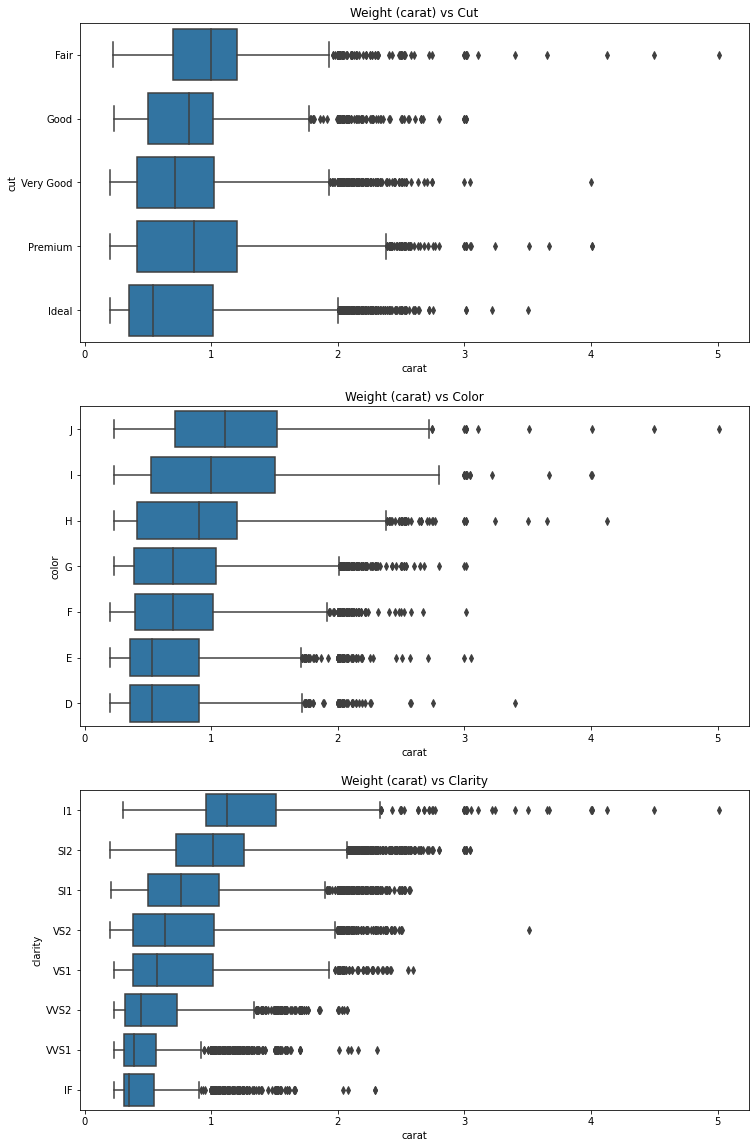

In [26]:
# bivariate plots of carat vs. cut, color, clarity
text = '1 numeric versus 1 categorical variable can be best illustrated by violin, box or barplot.\n'
print(text)

plt.figure(figsize=(12,20))
base_color = sb.color_palette()[0]

# price vs cut
plt.subplot(3,1,1)
sb.boxplot(data=diamonds, y = 'cut', x = 'carat', color = base_color)
plt.title('Weight (carat) vs Cut')

# text_cut = 'None of the cut categories are statistical significant. However, it looks like a low quality cut is within a slightly higher price range than for the ideal cut.\n'
# print(text_cut)

# price vs color
plt.subplot(3,1,2)
sb.boxplot(data=diamonds, y = 'color', x = 'carat', color = base_color)
plt.title('Weight (carat) vs Color')

# text_cut = 'None of the color categories are statistical significant. However, it looks like a low quality color is within a slightly higher price range than for the good quality color.\n'
# print(text_cut)

# price vs clarity
plt.subplot(3,1,3)
sb.boxplot(data=diamonds, y = 'clarity', x = 'carat', color = base_color)
plt.title('Weight (carat) vs Clarity')

# text_cut = 'None of the clarity categories are statistical significant. However, it looks like a low quality clarity is within a slightly higher price range than for the good clarity.\n'
# print(text_cut)

text = 'The findings explains pattern, diamonds with higher quality are often smaller in weight and for heavier diamonds it seems to be more difficult to simultaneously get high quality. Diamond weight (carat) seems to have the highest influence on price.'
print(text)

## Multivariate Exploration

We saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. We also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

The goal of this multivariate exploration is to depict these interaction effects through the use of multivariate plots.

Since clarity had the clearest interactions with price and carat, we start by creating a plot of the relationship between price, carat, and clarity.

In [27]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [28]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

Many observations makes it difficult to visualize the data in a color encoding scatterplot. Therefore, a facetted scatterplot would be a better choise.


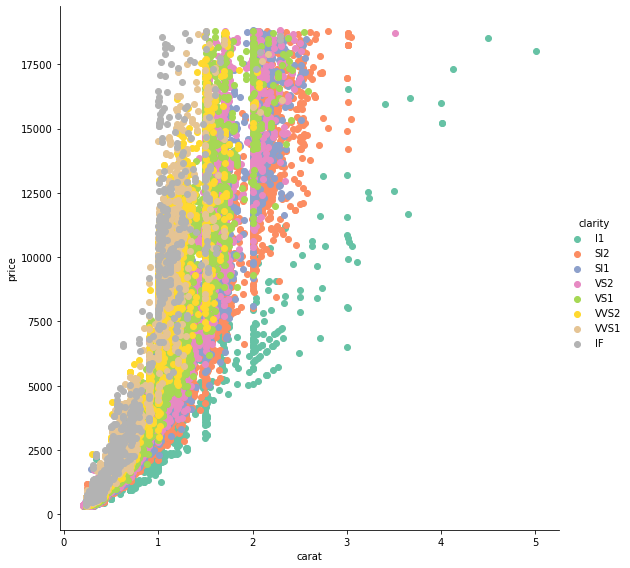

In [29]:
# price (numerical), carat (numerical) and clarity (categorical)
# scatterplot with color encoding

g = sb.FacetGrid(data = diamonds, hue = 'clarity', height = 8, palette = 'Set2')
g.map(plt.scatter, 'carat', 'price');
g.add_legend()

text = 'Many observations makes it difficult to visualize the data in a color encoding scatterplot. Therefore, a facetted scatterplot would be a better choise.'
print(text)

The higher clarity the more exponential price development per carat.


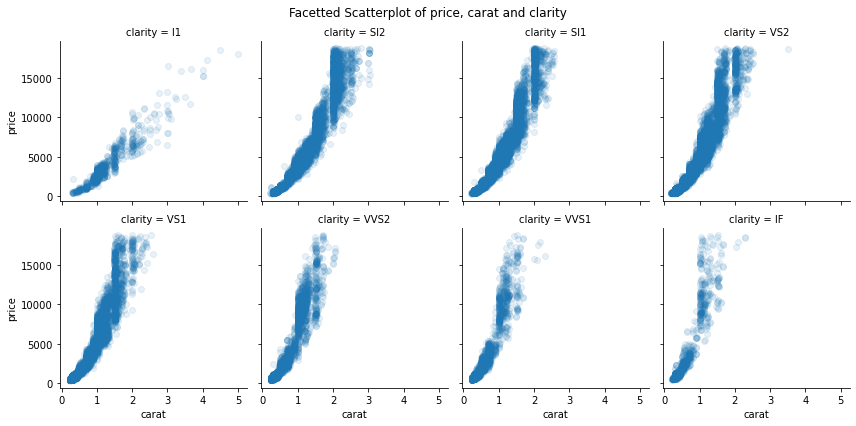

In [30]:
# facetted scatterplot
g = sb.FacetGrid(data = diamonds, col = 'clarity', col_wrap = 4, palette = 'Set2');
g.map(plt.scatter, 'carat', 'price', alpha = 0.1);

plt.subplots_adjust(top=0.9);
g.fig.suptitle('Facetted Scatterplot of price, carat and clarity');

text = 'The higher clarity the more exponential price development per carat.'
print(text)

In [31]:
diamonds_sub = diamonds[(diamonds.carat >= 0.5) & (diamonds.carat < 1.5)]

# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
mean_price_categories = diamonds_sub.groupby(['cut', 'color']).mean()['price']

# Use Series.reset_index() to convert a series into a dataframe object
mean_price_categories = mean_price_categories.reset_index(name='price_mean')

# Use DataFrame.pivot() to rearrange the data, to have color on rows
mean_price_categories = mean_price_categories.pivot(index = 'color', columns = 'cut', values = 'price_mean')

# Make praoce average an int
mean_price_categories.astype('int')



cut,Fair,Good,Very Good,Premium,Ideal
color,,,,,
J,2704,3208,3329,3669,3662
I,2819,3281,3634,4090,3704
H,3078,3623,4029,4413,4115
G,3036,3972,4239,4630,4669
F,3275,3629,4243,4379,4347
E,3319,3655,3835,3908,3697
D,3684,3835,4148,4222,3856


In [32]:
# diamonds_sub = diamonds[(diamonds.carat >= 0.5) & (diamonds.carat < 1.5)]
diamonds_sub = diamonds[diamonds.carat == 1.0]

# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
mean_price_categories = diamonds_sub.groupby(['cut', 'color']).mean()['price']

# Use Series.reset_index() to convert a series into a dataframe object
mean_price_categories = mean_price_categories.reset_index(name='price_mean')

# Use DataFrame.pivot() to rearrange the data, to have color on rows
mean_price_categories = mean_price_categories.pivot(index = 'color', columns = 'cut', values = 'price_mean')

# Make praoce average an int
mean_price_categories = mean_price_categories.astype('int')

# sort color
mean_price_categories.sort_values(by = 'color', ascending = False, inplace = True)

The price pattern shows that 1 carat diamond prices are highest in the top right quadrant of the heatmap for cuts Very Good to Ideal and colors G-D. Not surprisingly, an ideal cut and the most transparent color (D) yields the highest price.


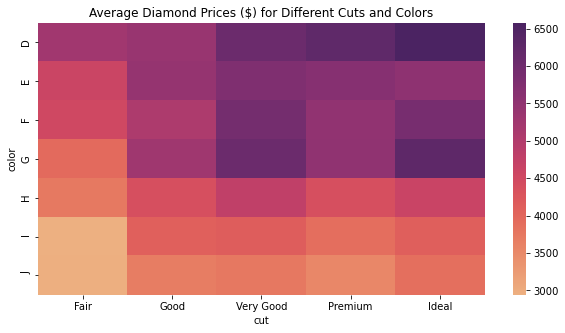

In [33]:
# Plot the heatmap
plt.figure(figsize = (10,5))
sb.heatmap(mean_price_categories, cmap = 'flare');
plt.title('Average Diamond Prices ($) for Different Cuts and Colors');

# text = 'Ideal and premium cut in combination with G color yields the highest diamond prices.'
text = 'The price pattern shows that 1 carat diamond prices are highest in the top right quadrant of the heatmap for cuts Very Good to Ideal and colors G-D. Not surprisingly, an ideal cut and the most transparent color (D) yields the highest price.'
print(text)


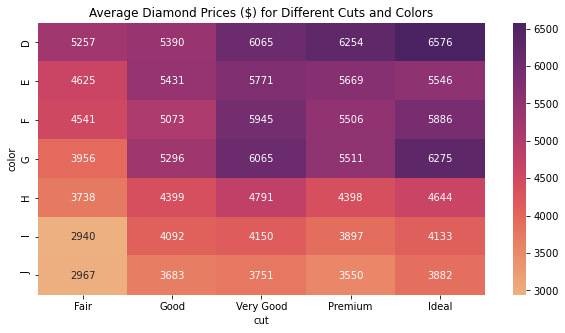

In [34]:
# Plot the heatmap
plt.figure(figsize = (10,5))
sb.heatmap(mean_price_categories, annot = True, cmap = 'flare', fmt='g');
plt.title('Average Diamond Prices ($) for Different Cuts and Colors');



<AxesSubplot:xlabel='color', ylabel='price'>

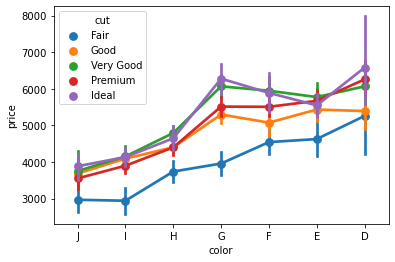

In [38]:
# pointplot

sb.pointplot(data = diamonds_sub, x = 'color', y = 'price', hue = 'cut')

## Explanatory Polishing

The exploration of the dataset relating the price of diamonds attributes (carat, cut, color, and clarity) showed:
- The primary driver of price was carat weight, where the log of price was approximately linearly related to the log of carat weight. 

Further, the price was then modified by the diamond's cut, color, and clarity grades. Conclusion:
- For 1 Carat diamonds, the price pattern shows that diamond prices are highest for cuts Very Good to Ideal and colors G-D. Not surprisingly, an ideal cut and the most transparent color (D) yields the highest price.

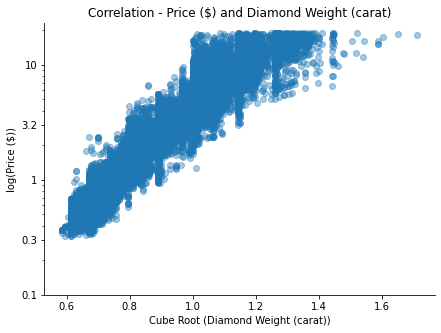

In [37]:
# help to remove mini tickmarks on y axis

# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

# ticks definition
yticks = [100, 300, 1000, 3000, 10000];

# plot 
plt.figure(figsize = [7, 5])
plt.scatter(data = diamonds, x = 'cr_carat', y = 'price', alpha = 0.4)

# axis
plt.xlabel('Cube Root (Diamond Weight (carat))')
plt.ylabel('log(Price ($))')

plt.yscale('log');
plt.yticks(yticks, labels);

# extract the spines and make them invisible
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

# remove mini ticks - doesnt work
plt.tick_params(axis = "y", which = "minor", bottom = False, top = False)

plt.title('Correlation - Price ($) and Diamond Weight (carat)');


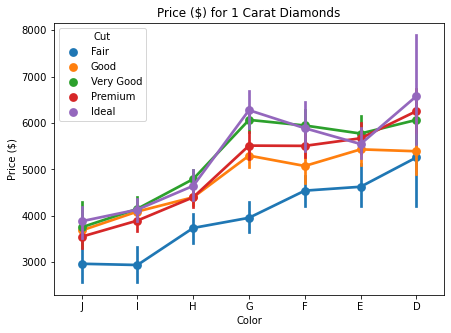

In [46]:
# pointplot
plt.figure(figsize = (7,5))
sb.pointplot(data = diamonds_sub, x = 'color', y = 'price', hue = 'cut');
plt.title('Price ($) for 1 Carat Diamonds');
plt.ylabel('Price ($)')
plt.xlabel('Color')
plt.legend(title='Cut');
